In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing, load_digits

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression

# 02. Linear and Logistic Regression

### Live Demo

The imported dataset california housing, is cleaned datat to be used for ML

In [2]:
ds = fetch_california_housing()

In [3]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(ds.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
# to read the data like a pd.dataframe:
ds = fetch_california_housing(as_frame=True)

In [6]:
house_prices_df = ds.frame

In [7]:
house_prices_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


The target data is the last col 'MedHouseVal'. We model one column as a function of the passed data. Checking and analyzing hist

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

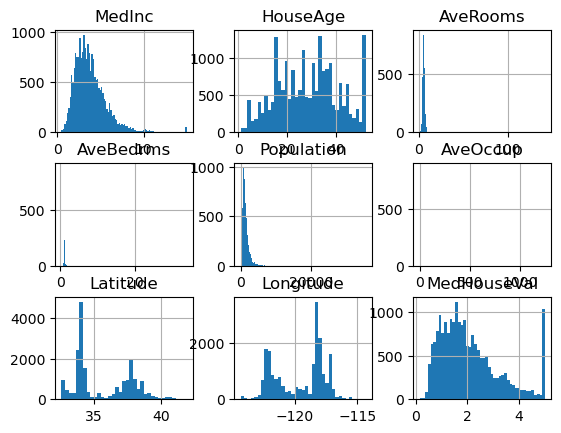

In [8]:
house_prices_df.hist(bins='fd')

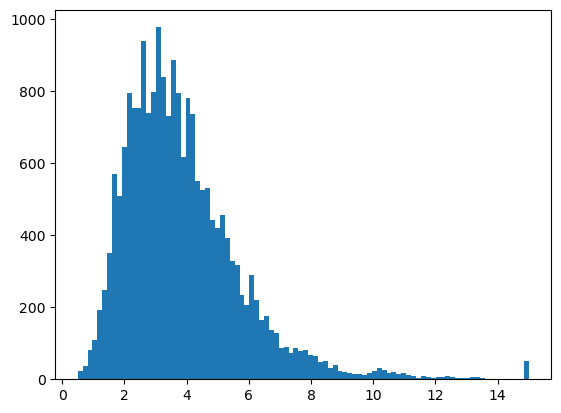

In [9]:
plt.hist(house_prices_df.MedInc, bins='fd')
plt.show()

In [10]:
house_prices_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
model = LinearRegression()

In [12]:
model

LinearRegression()

In [13]:
# this is wrong
model.fit(house_prices_df, house_prices_df.MedHouseVal)

LinearRegression()

In [14]:
model.coef_

array([-1.77329950e-15, -1.81372051e-15, -5.25496002e-16,  4.03515217e-15,
       -2.08537451e-19, -1.10910761e-16, -3.61254559e-16, -1.31168396e-16,
        1.00000000e+00])

In [15]:
model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], dtype=object)

In [16]:
list(zip(model.feature_names_in_, model.coef_))

[('MedInc', -1.7732994959161735e-15),
 ('HouseAge', -1.8137205143637093e-15),
 ('AveRooms', -5.254960024015975e-16),
 ('AveBedrms', 4.035152170611702e-15),
 ('Population', -2.0853745105020966e-19),
 ('AveOccup', -1.1091076072983423e-16),
 ('Latitude', -3.6125455880257346e-16),
 ('Longitude', -1.3116839575236271e-16),
 ('MedHouseVal', 1.000000000000001)]

Errors:
1. MedHouseValue, which is target output should not be part of the model

Fit the model with separated coef and target value

In [17]:
house_attr = house_prices_df.drop(columns=['MedHouseVal'])
house_val = house_prices_df.MedHouseVal

In [18]:
model.fit(house_attr, house_val)

LinearRegression()

In [19]:
list(zip(model.feature_names_in_, model.coef_))

[('MedInc', 0.4366932931343246),
 ('HouseAge', 0.009435778033238069),
 ('AveRooms', -0.10732204139090418),
 ('AveBedrms', 0.6450656935198134),
 ('Population', -3.976389421207444e-06),
 ('AveOccup', -0.00378654265497081),
 ('Latitude', -0.42131437752714374),
 ('Longitude', -0.43451375467477804)]

Error 2. Due to big range min() and max() -> normalizing

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(house_prices_df)

MinMaxScaler()

In [22]:
scaler.transform(house_prices_df)

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

In [23]:
scaled_attr = scaler.fit_transform(house_attr)

In [24]:
model_scaled = LinearRegression()

In [25]:
model_scaled.fit(scaled_attr, house_val)

LinearRegression()

We analyze the target feature:

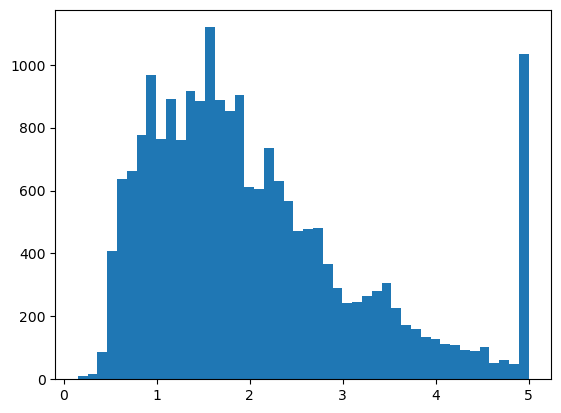

In [26]:
plt.hist(house_prices_df.MedHouseVal, bins='fd')
plt.show()

We observed that there are outliers. We check and remove them in order to normalize the dataset and we normalize with minmaxscaler then fit to the model

In [27]:
house_prices_df = house_prices_df[house_prices_df.MedHouseVal <= 5]

In [28]:
house_attr = house_prices_df.drop(columns=['MedHouseVal'])
house_val = house_prices_df.MedHouseVal

In [29]:
scaled_attr = scaler.fit_transform(house_attr)
model_scaled = LinearRegression()
model_scaled.fit(scaled_attr, house_val)

LinearRegression()

In [30]:
list(zip(model.feature_names_in_, model_scaled.coef_))

[('MedInc', 6.264666273895677),
 ('HouseAge', 0.41712684852092713),
 ('AveRooms', -14.553041960731651),
 ('AveBedrms', 20.693845161869064),
 ('Population', 0.1638906265123342),
 ('AveOccup', -4.284279002633801),
 ('Latitude', -3.570185801707091),
 ('Longitude', -3.974934862843121)]

In [31]:
z_score = StandardScaler().fit_transform(house_attr)

In [32]:
z_score_model = LinearRegression()
z_score_model.fit(z_score, house_val)

LinearRegression()

In [33]:
list(zip(model.feature_names_in_, z_score_model.coef_))

[('MedInc', 0.6784028909722375),
 ('HouseAge', 0.10230890631596892),
 ('AveRooms', -0.2533470347321316),
 ('AveBedrms', 0.27717527061724034),
 ('Population', 0.005253189350408793),
 ('AveOccup', -0.03665515422123455),
 ('Latitude', -0.8156213233862963),
 ('Longitude', -0.7942178625015119)]

In [34]:
ransac_model = RANSACRegressor()

In [35]:
ransac_model.fit(scaled_attr, house_val)

RANSACRegressor()

In [36]:
ransac_model.estimator_.coef_

array([ 4.54671094e+00, -3.85680504e-01, -1.26418680e+00,  1.56924627e+01,
        1.07824249e+00, -5.84600262e+02, -4.98152715e+00, -5.83466028e+00])

In [37]:
# we can take the sample data, considered inliers
house_attr[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
# the ooutliers:
house_attr[~ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
16,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27
...,...,...,...,...,...,...,...,...
20592,0.8928,52.0,4.442953,1.073826,520.0,3.489933,39.14,-121.58
20600,3.1029,18.0,4.945455,1.112121,769.0,2.330303,39.16,-121.57
20601,1.5694,30.0,5.022727,1.170455,413.0,4.693182,39.13,-121.57
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52


In [39]:
model_scaled.score(scaled_attr, house_val)

0.5701011070331934

In [40]:
ransac_model.score(scaled_attr, house_val)

-25.42417337954154

In [41]:
ransac_model.score(scaled_attr[ransac_model.inlier_mask_], house_val[ransac_model.inlier_mask_])

0.8584846075075772

In [42]:
ransac_model = RANSACRegressor(residual_threshold=0.1)

In [43]:
ransac_model.fit(scaled_attr, house_val)

RANSACRegressor(residual_threshold=0.1)

In [44]:
ransac_model.inlier_mask_.sum() / len(scaled_attr)

0.12523506988564168

In [45]:
poly_transform = PolynomialFeatures(degree=7)

In [46]:
poly_transform.fit(scaled_attr)

PolynomialFeatures(degree=7)

In [47]:
poly_transform.get_feature_names_out()

array(['1', 'x0', 'x1', ..., 'x6^2 x7^5', 'x6 x7^6', 'x7^7'], dtype=object)

The new features are generated

In [48]:
poly_reg = LinearRegression()

In [49]:
poly_reg.fit(poly_transform.transform(scaled_attr), house_val)

LinearRegression()

In [50]:
poly_reg.score(poly_transform.transform(scaled_attr), house_val)

0.8724561943897573

In [51]:
poly_reg.coef_

array([-1.32509727e+13, -3.14680068e+03, -4.42922001e+03, ...,
        2.48146607e+06,  9.55655628e+05,  1.54740615e+05])

In [52]:
poly_reg.coef_.shape

(6435,)

In [53]:
mnist_data = load_digits(as_frame=True)['frame']

In [54]:
len(mnist_data.loc[1170].values)

65

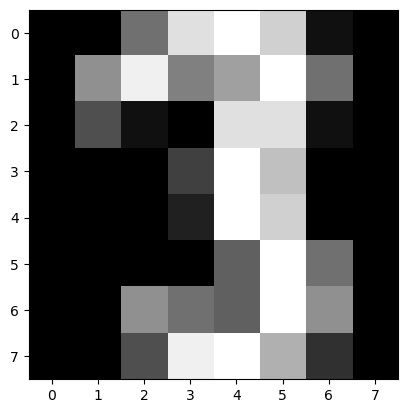

In [55]:
plt.imshow(mnist_data.loc[1170].values[:-1].reshape(8, 8), cmap='gray')
plt.show()

In [56]:
mnist_data.loc[1170]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     7.0
pixel_0_3    14.0
pixel_0_4    16.0
             ... 
pixel_7_4    16.0
pixel_7_5    11.0
pixel_7_6     3.0
pixel_7_7     0.0
target        3.0
Name: 1170, Length: 65, dtype: float64

In [57]:
digits_classifier = LogisticRegression(C=1e12)

In [58]:
digits_classifier.fit(mnist_data.drop(columns='target'), mnist_data.target)

LogisticRegression(C=1000000000000.0)

In [59]:
digits_classifier.coef_.shape

(10, 64)

In [60]:
digits_classifier.intercept_

array([-0.00450005, -0.12282676, -0.00579932,  0.02567985,  0.11714389,
        0.0023501 , -0.0379142 ,  0.02767066,  0.06957017, -0.07137433])

In [185]:
digits_classifier.score(mnist_data.drop(columns='target'), mnist_data.target)

1.0